In [1]:
!pip install osmnx networkx geopandas matplotlib folium

import osmnx as ox
import networkx as nx
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

# Step 1: Define cities (Indian metros)

In [2]:
cities = [
    'Delhi, India', 
    'Mumbai, India', 
    'Kolkata, India', 
    'Chennai, India'
]

# Step 2: Download and plot admin boundaries

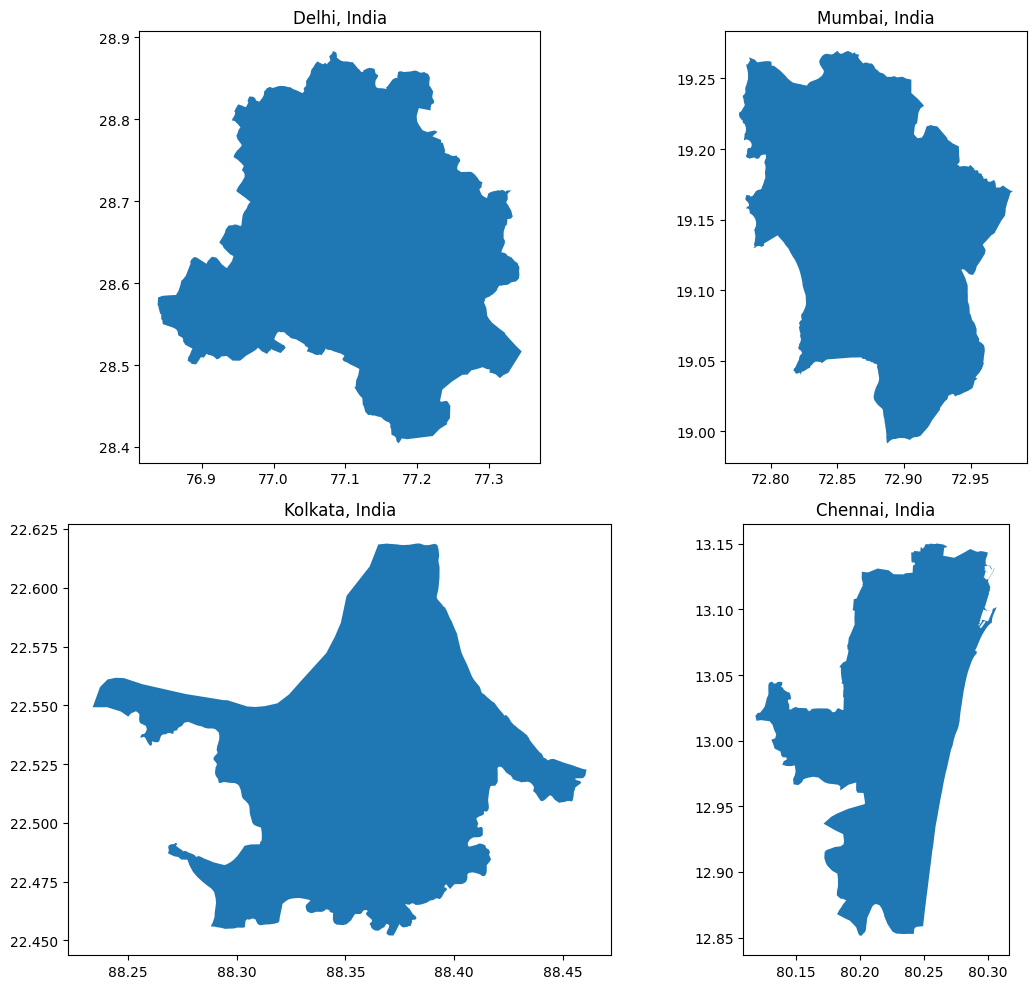

In [3]:
f, ax = plt.subplots(2, 2, figsize=(12, 10))
indicies = [(i, j) for i in range(2) for j in range(2)]
cities_admins = {}

for idx, city in enumerate(cities):
    bx = ax[indicies[idx]]
    admin = ox.geocode_to_gdf(city)
    admin.plot(ax=bx)
    bx.set_title(city)
    cities_admins[city] = admin

plt.tight_layout()
plt.show()

# Step 3: Download road networks for each city

In [4]:
city_graphs = {}
city_edges = {}
city_nodes = {}
for city, admin in cities_admins.items():
    G = ox.graph_from_polygon(admin.geometry.iloc[0], network_type='drive')
    nodes, edges = ox.graph_to_gdfs(G)
    print(f"{city} - Nodes: {len(nodes)}, Edges: {len(edges)}")
    city_graphs[city] = G
    city_edges[city] = edges
    city_nodes[city] = nodes

Delhi, India - Nodes: 183041, Edges: 498337
Mumbai, India - Nodes: 18710, Edges: 43036
Kolkata, India - Nodes: 35672, Edges: 90918
Chennai, India - Nodes: 52752, Edges: 132948


# Step 4: Quick visual preview of road networks

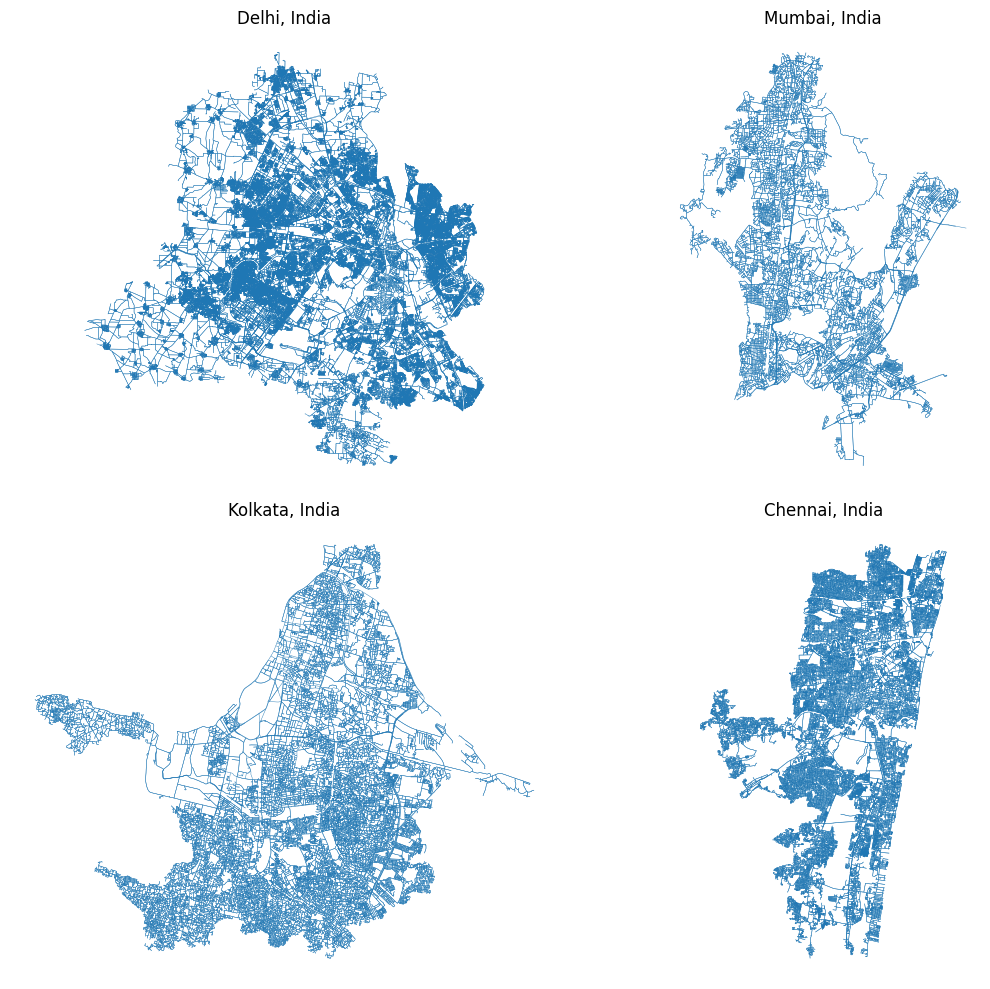

In [5]:
f, ax = plt.subplots(2, 2, figsize=(12, 10))
for idx, (city, edges) in enumerate(city_edges.items()):
    bx = ax[indicies[idx]]
    edges.plot(ax=bx, linewidth=0.3)
    bx.axis('off')
    bx.set_title(city)

plt.tight_layout()
plt.show()

# Step 5: Colorized plots (neon aesthetic with background and spacing fixes)

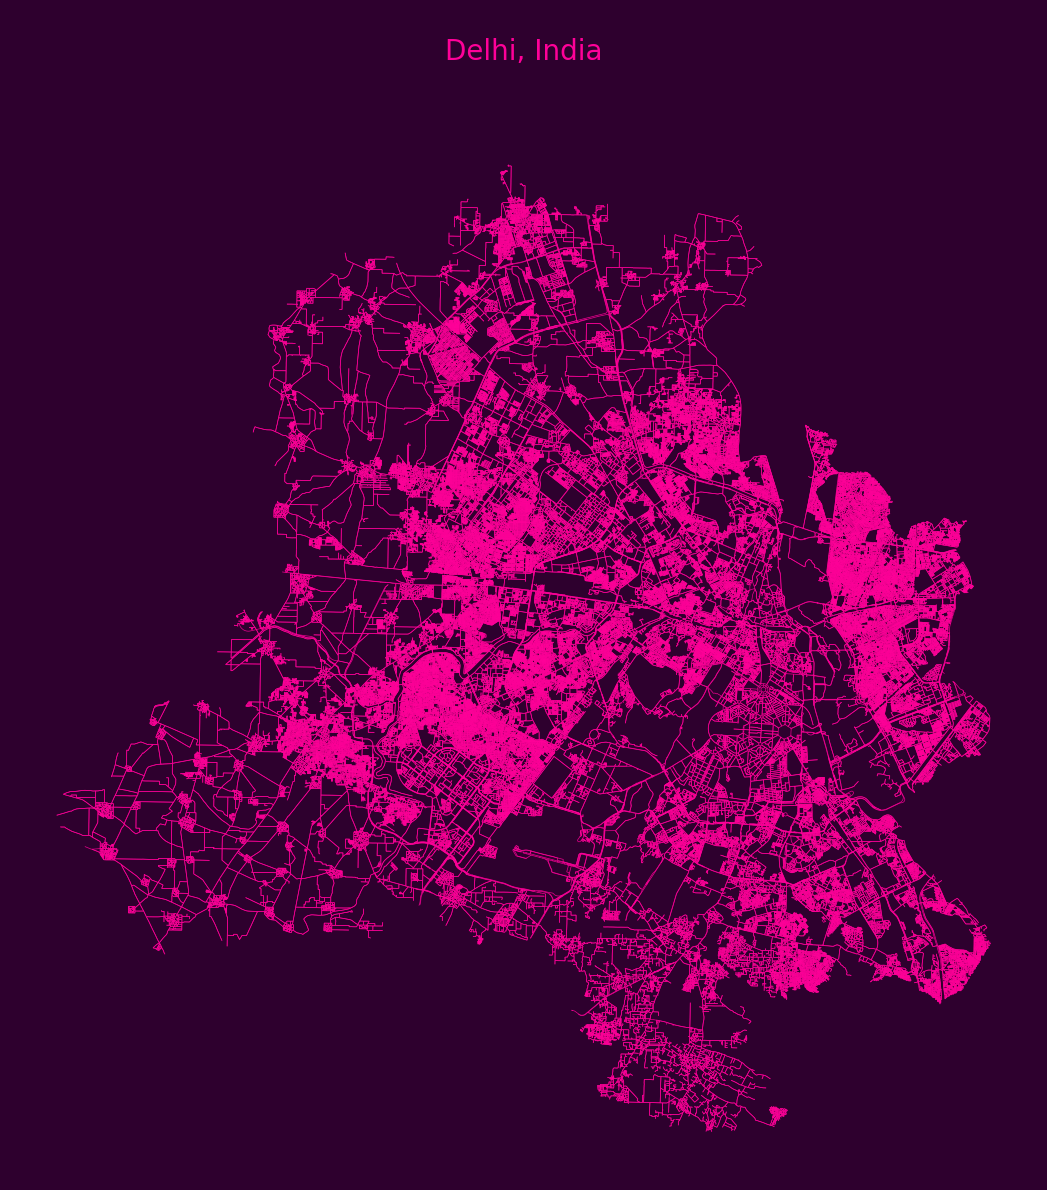

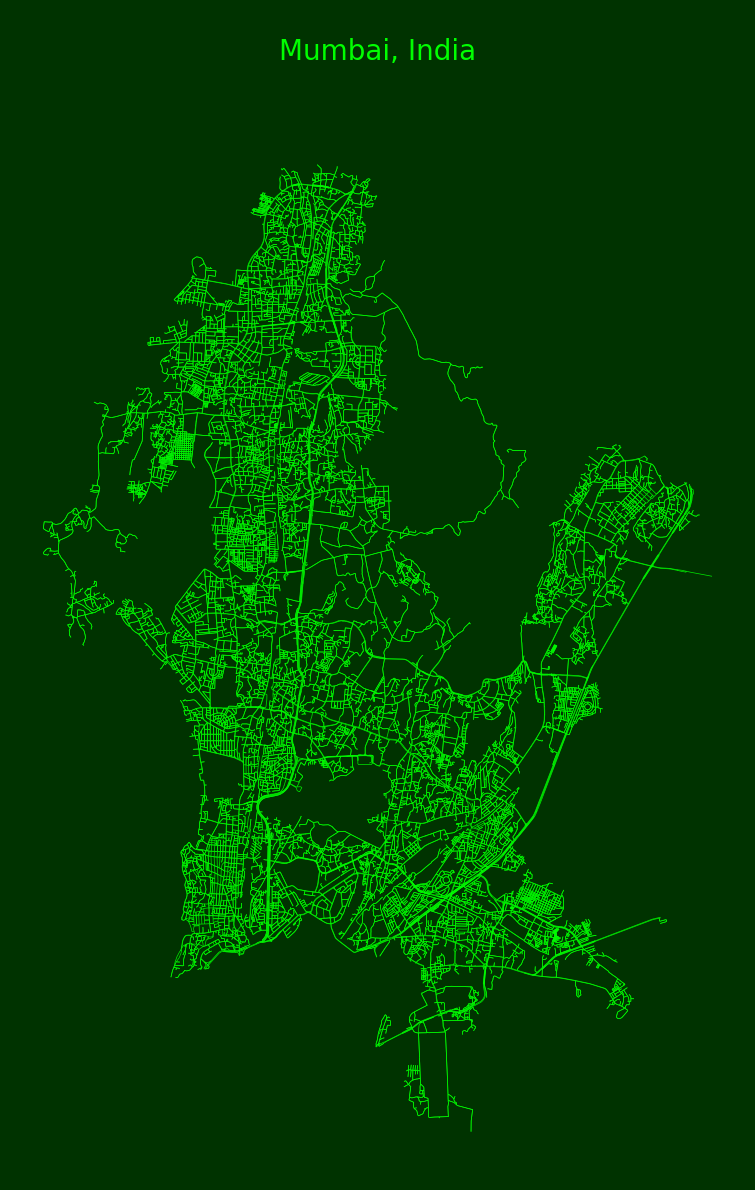

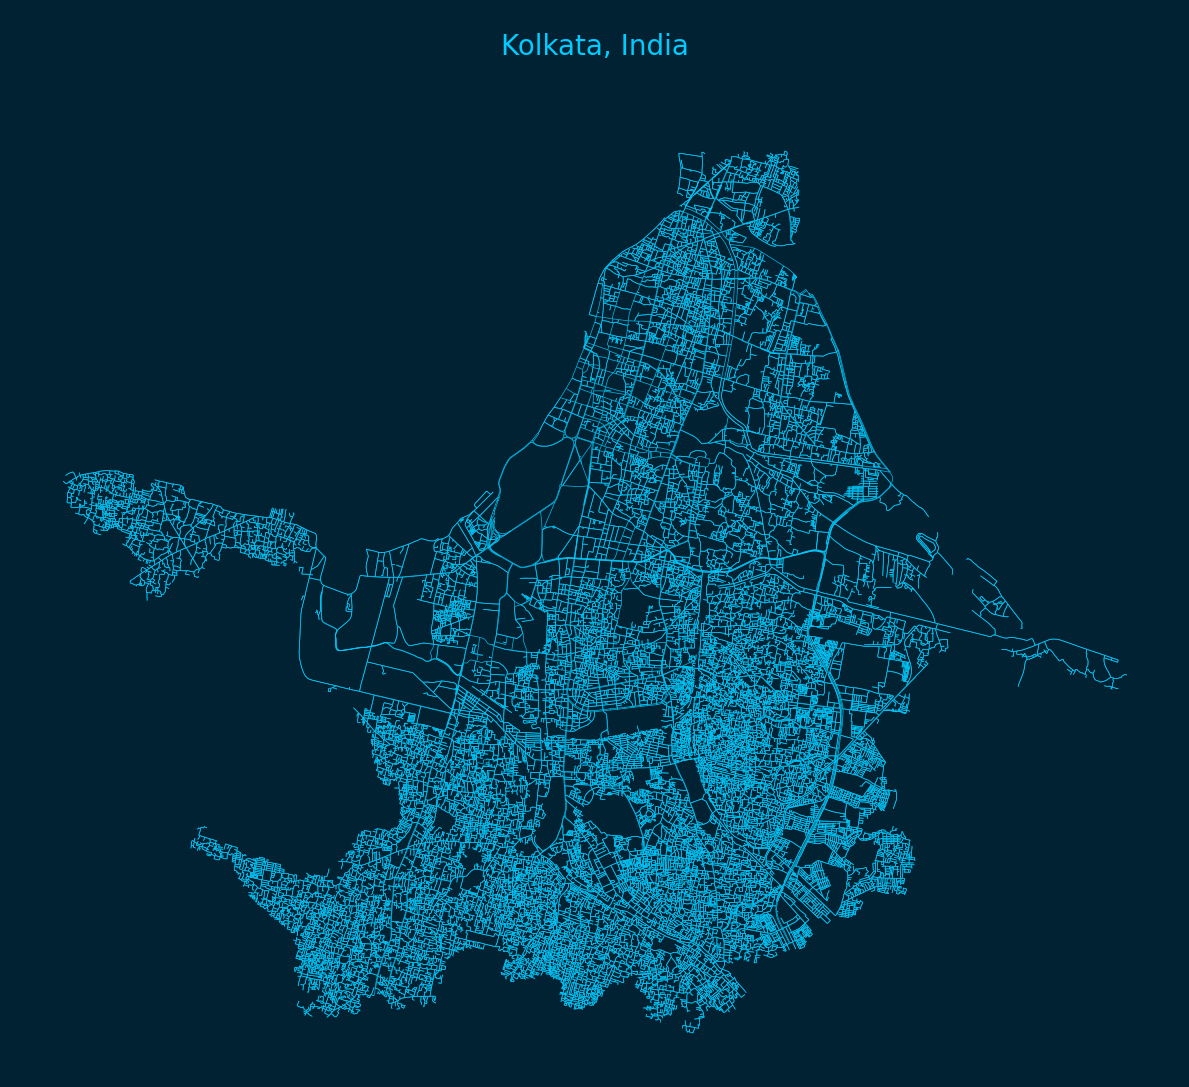

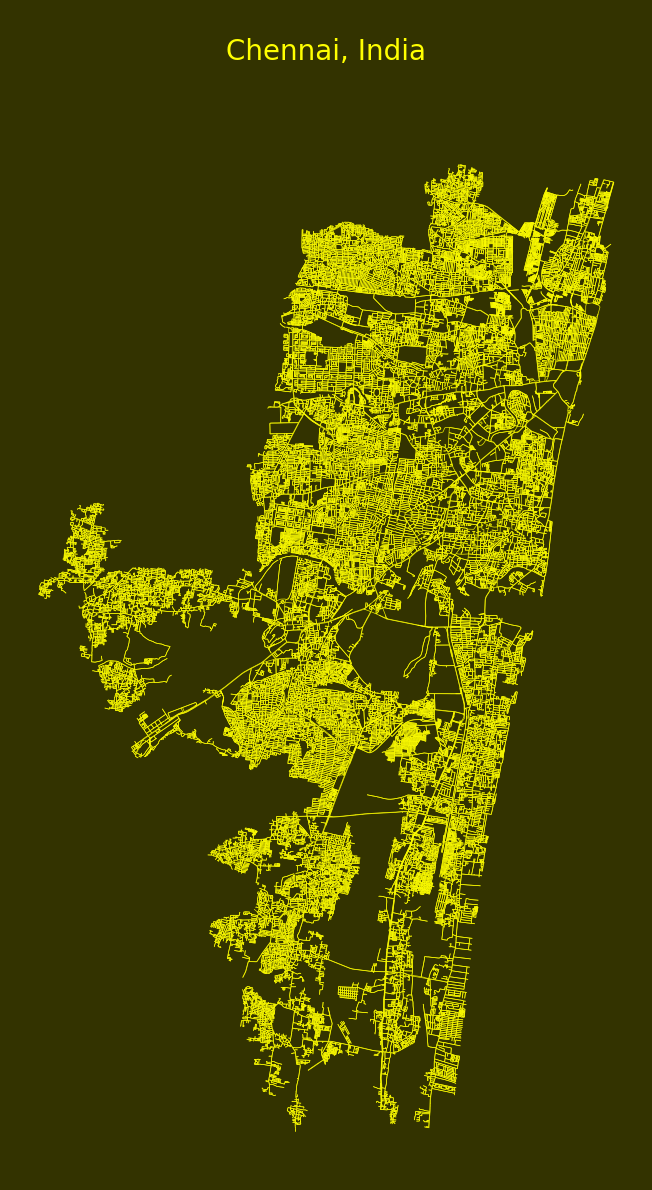

In [6]:
color_palette = [
    {"Neon": "#ff0099",  "Background": "#2e002e"},
    {"Neon": "#00ff00",  "Background": "#003300"},
    {"Neon": "#00ccff",  "Background": "#002233"},
    {"Neon": "#ffff00",  "Background": "#333300"}
]

for idx, (city, edges) in enumerate(city_edges.items()):   
    neon = color_palette[idx]['Neon']
    bg = color_palette[idx]['Background']

    f, ax = plt.subplots(figsize=(12, 12), facecolor=bg)
    edges.plot(ax=ax, color=neon, linewidth=0.5, alpha=0.9)
    ax.set_facecolor(bg)

    # Remove ticks and spines
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Adjust title positioning
    ymin, ymax = ax.get_ylim()
    extension = 0.1 * (ymax - ymin)
    ax.set_ylim(ymin, ymax + extension)
    ax.set_title(city, fontsize=20, color=neon, y=0.95)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# Step 6: Define city names and query boundaries

In [7]:
cities = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata']
city_graphs = {}
city_boundaries = {}

for city in cities:
    # Get boundary polygon and street graph
    gdf = ox.geocode_to_gdf(city)
    city_boundaries[city] = gdf
    graph = ox.graph_from_place(city, network_type='drive')
    city_graphs[city] = graph


# Step 7: Compute Road Network Metrics

In [8]:
projected_crs = "EPSG:32643"  # UTM zone for India (approx.)
metrics = []

for city in cities:
    G = city_graphs[city]
    boundary = city_boundaries[city]

    # Project the graph and boundary for accurate length/area calculation
    G_proj = ox.project_graph(G, to_crs=projected_crs)
    boundary_proj = boundary.to_crs(projected_crs)

    # Compute total area (in m²) of the boundary polygon
    total_area = boundary_proj.geometry.area.iloc[0]  # assuming one polygon

    # Compute basic graph statistics
    stats = ox.basic_stats(G_proj, clean_int_tol=15)

    # Build metrics row
    metrics.append({
        'City': city,
        'Total Street Length (km)': round(stats['edge_length_total'] / 1000, 2),
        'Street Density (km/km²)': round((stats['edge_length_total'] / 1000) / (total_area / 1e6), 2),
        'Intersection Density (/km²)': round(stats['intersection_count'] / (total_area / 1e6), 2),
        'Avg Streets per Node': round(stats.get('streets_per_node_avg', 0.0), 2),
    })


# Step 8: Display metrics

In [9]:
metrics_df = pd.DataFrame(metrics)

print("\n📊 Network Metrics Summary:")
display(metrics_df)



📊 Network Metrics Summary:


,City,Total Street Length (km),Street Density (km/km²),Intersection Density (/km²),Avg Streets per Node
0,Delhi,32879.51,22.25,104.94,2.87
1,Mumbai,4520.59,11.63,38.06,2.76
2,Chennai,9366.40,28.60,124.88,2.67
3,Kolkata,5737.24,29.96,146.52,2.66


In [10]:
import os
import matplotlib.pyplot as plt

# Make sure output folder exists
output_folder = "D:/suman-portfolio/python-projects/Road Network/exports"
os.makedirs(output_folder, exist_ok=True)

color_palette = [
    {"Neon": "#ff0099",  "Background": "#2e002e"},
    {"Neon": "#00ff00",  "Background": "#003300"},
    {"Neon": "#00ccff",  "Background": "#002233"},
    {"Neon": "#ffff00",  "Background": "#333300"}
]

for idx, (city, edges) in enumerate(city_edges.items()):   
    neon = color_palette[idx]['Neon']
    bg = color_palette[idx]['Background']

    fig, ax = plt.subplots(figsize=(12, 12), facecolor=bg)
    edges.plot(ax=ax, color=neon, linewidth=0.5, alpha=0.9)
    ax.set_facecolor(bg)

    # Remove ticks and spines
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Adjust title positioning
    ymin, ymax = ax.get_ylim()
    extension = 0.1 * (ymax - ymin)
    ax.set_ylim(ymin, ymax + extension)
    ax.set_title(city, fontsize=20, color=neon, y=0.95)
    ax.axis('off')
    plt.tight_layout()

    # Save image to file
    filename = os.path.join(output_folder, f"{city.replace(' ', '_')}_network.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor=bg)
    plt.close(fig)  # Close figure to free memory
